Exploratory analysis of feature files
---
feature files created by create_feature_file.py

Summary of environmentScoreSlope_1000_5000:
count    39.000000
mean     -1.088198
std       1.785300
min      -5.389948
25%      -1.536576
50%      -0.098896
75%       0.114016
max       0.846896
Name: environmentScoreSlope_1000_5000, dtype: float64
number of positive values: 15
Top 5: 
26    ATN_673.csv.gz
25    ATN_646.csv.gz
34    ATN_856.csv.gz
14    ATN_327.csv.gz
7     ATN_151.csv.gz
Name: filename, dtype: object



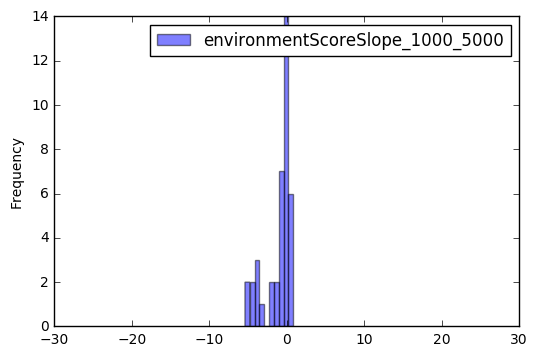

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#df = pd.read_csv('../data/box/10-species/31-44-45-47-49-50-66-75-1001-1005/set93/features.set93.labelled.csv')
pd.read_csv('features.set100.labelled.csv')

def summarize(col):
    print("Summary of " + col + ":")
    df[col].plot(kind='hist', alpha=0.5, legend=True, xlim=(-30, 30))  # NOTE: xlim is set specifically for first plot below
    print(df[col].describe())
    #print("first quartile: {}".format(df[col].quantile(0.25)))
    #print("last quartile: {}".format(df[col].quantile(0.75)))
    
    positive = df[df[col] > 0]
    print("number of positive values: {}".format(positive[col].count()))
    #print(positive['filename'])
    
    print("Top 5: ")
    print(df.sort_values(col, ascending=False)['filename'][:5])
    
    print()

def crosstab(col1, col2):
    print(pd.crosstab(df[col1].replace(np.nan, 'unlabelled'),
                      df[col2].replace(np.nan, 'unlabelled')))
    print()
    
def compare(col1, col2):
    """
    Do a comparison between the two given outcome measures (and labels derived therefrom)
    """
    crosstab('label_'+ col1, 'label_' + col2)
    plt.figure()
    df.plot.scatter(col1, col2)
    
#summarize('maxBiomass')
#summarize('lastNonzeroTimestep')

#summarize('environmentScoreSlope_200_5000')
summarize('environmentScoreSlope_1000_5000')
#summarize('environmentScoreMean_4500_5000')
#summarize('environmentScoreSlope_200_1000')

# Compare 500, 1000, 5000 timesteps with slope
#compare('environmentScoreSlope_200_1000', 'environmentScoreSlope_200_500')
#compare('environmentScoreSlope_200_1000', 'environmentScoreSlope_200_5000')

# Compare environment score mean to current slope-based label
#compare('environmentScoreSlope_200_1000', 'environmentScoreMean_500_1000')
#compare('environmentScoreSlope_200_1000', 'environmentScoreMean_4500_5000')

# Compare environment score mean to long-slope-based label
#compare('environmentScoreSlope_200_5000', 'environmentScoreMean_500_1000')
#compare('environmentScoreSlope_200_5000', 'environmentScoreMean_4500_5000')

# Compare 500, 1000, 5000 timesteps with means
#compare('environmentScoreMean_500_1000', 'environmentScoreMean_0_500')
#compare('environmentScoreMean_500_1000', 'environmentScoreMean_4500_5000')